In [1]:
import pandas as pd
import numpy as np

# Configuration pour voir tout le tableau
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# 1. Chargement
df = pd.read_csv('animes.csv')

# Je supprime les doublons
df = df.drop_duplicates()

# Je supprime les lignes où il manque des notes importantes
df = df.dropna(subset=['Note_Globale', 'Note_Meilleur_Ep', 'Note_Pire_Ep'])

# Je remplis les textes vides
df = df.fillna("Non renseigné")

# 2. Mes calculs pour le projet

# Calcul 1 : L'écart (pour voir si l'animé est régulier ou pas)
df['Ecart'] = df['Note_Meilleur_Ep'] - df['Note_Pire_Ep']

# Calcul 2 : Note de Régularité (sur 10)
# Plus l'écart est petit, meilleure est la note
df['Regularite'] = 10 - df['Ecart']

# Calcul 3 : Est-ce que c'est surcoté ?
# Je calcule la moyenne entre le meilleur et le pire épisode
Moyenne_Episodes = (df['Note_Meilleur_Ep'] + df['Note_Pire_Ep']) / 2
# Je compare avec la note globale
df['Difference_Hype'] = df['Note_Globale'] - Moyenne_Episodes

# Calcul 4 : Logarithme du nombre d'épisodes (pour normaliser)
df['Log_Longueur'] = np.log(df['Nb_Episodes'])

# 3. Création du Score Final

# Fonction pour donner un bonus si l'animé est fini
def calculer_bonus(statut):
    if statut == 'Fini':
        return 1
    else:
        return 0

# J'applique ma fonction sur la colonne Status
# (C'est plus simple que le "lambda" de l'IA)
df['Bonus_Fini'] = df['Status'].apply(calculer_bonus)

# Ma formule : 50% Note Globale + 40% Régularité + Petit bonus si fini
df['Score_Final'] = (0.5 * df['Note_Globale']) + (0.4 * df['Regularite']) + (0.1 * df['Bonus_Fini'])

# 4. Étiquettes (Labels)

# Fonction pour mettre une étiquette selon le score
def donner_etiquette(row):
    if row['Score_Final'] >= 8.6:
        return "Top Tier"
    elif row['Difference_Hype'] > 1.0:
        return "Risqué (Hype)"
    elif row['Regularite'] < 5.0:
        return "Irrégulier"
    elif row['Score_Final'] < 7.0:
        return "Pas terrible"
    else:
        return "Bien"

# J'applique l'étiquette ligne par ligne (axis=1 veut dire qu'on lit ligne par ligne)
df['Mon_Avis'] = df.apply(donner_etiquette, axis=1)

# 5. Résultat

# Je trie du plus grand score au plus petit
df_trie = df.sort_values(by='Score_Final', ascending=False)

# J'enregistre le fichier propre
df_trie.to_csv('animes_calcules_complet.csv', index=False)

print("C'est bon, le classement est fait !")
# J'affiche le tableau final
display(df_trie)


C'est bon, le classement est fait !


,Anime,Genre_Tags,Source,Nb_Episodes,Status,Studio,Date_Pub,Note_Globale,Note_Meilleur_Ep,Meilleur_Ep_Titre,Comm_Meilleur_Ep,Note_Pire_Ep,Pire_Ep_Titre,Comm_Pire_Ep,Comm_Saison_1,Comm_Saison_2,Comm_Saison_3,Ecart,Regularite,Difference_Hype,Log_Longueur,Bonus_Fini,Score_Final,Mon_Avis
43,Your Lie in April,Drama / Music,Manga,22,Fini,A-1 Pictures,2014-10-09,8.6,9.5,Ep 22: Spring Breeze,La lettre de Kaori. Préparez les mouchoirs.,8.4,Ep 1: Monotone/Colorful,"Début un peu lent pour certains, mais visuelle...",Une oeuvre magnifique sur le traumatisme et la...,La musique classique est un personnage à part ...,Kaori Miyazono : une flamme qui brûle vite et ...,1.1,8.9,-0.35,3.091042,1,7.96,Bien
21,Steins;Gate,Sci-Fi / Thriller,Visual Novel,24,Fini,White Fox,2011-04-06,9.1,9.7,Ep 22: Being Meltdown,Le choix impossible entre Kurisu et Mayuri. So...,7.8,Ep 1: Turning Point,"Début très lent et confus (voulu), filtre beau...","Mise en place lente, tranche de vie et théorie...","Basculement dans le thriller, course contre la...",Dénouement et atteinte de la ligne d'univers S...,1.9,8.1,0.35,3.178054,1,7.89,Bien
31,Mushishi,Slice of Life / Supernatural,Manga,26,Fini,Artland,2005-10-23,8.7,9.4,Ep 12: One-Eyed Fish,Histoire poétique et mélancolique typique de l...,8.0,Ep 5: The Traveling Swamp,"Pas de mauvais épisode, juste des histoires mo...","Voyage de Ginko, histoires épisodiques apaisan...",Exploration de la nature invisible (Mushi) et ...,"Pas de fil rouge fort, mais une ambiance uniqu...",1.4,8.6,0.00,3.258097,1,7.89,Bien
44,Monster,Thriller / Mystery,Manga,74,Fini,Madhouse,2004-04-07,8.9,9.1,Ep 4: Night of Punishment,Tension insoutenable et écriture magistrale.,7.4,Ep 8: The Fugitive,"Rythme plus lent, mise en place des pièces.",Johan Liebert est le meilleur méchant de l'his...,Un thriller psychologique lent mais incroyable...,"Pas de pouvoirs, juste la noirceur de l'âme hu...",1.7,8.3,0.65,4.304065,1,7.87,Bien
15,Du mouvement de la Terre,Historical / Drama,Manga,8,Fini,Madhouse,2024-10-05,8.4,8.9,Ep 8: La vérité,Conclusion philosophique puissante sur la scie...,7.8,Ep 2: L'hérétique,Mise en place un peu dense des concepts astron...,Lutte intellectuelle et tortures pour prouver ...,(Série courte en 1 saison unique),(Non diffusé),1.1,8.9,0.05,2.079442,1,7.86,Bien
45,Hajime no Ippo,Sport / Boxing,Manga,76,Fini,Madhouse,2000-10-04,8.8,9.2,Ep 75: The First Step,Conclusion de la saison 1. Ippo devient champion.,7.5,Ep 30: Motivation,"Quelques longueurs, mais nécessaire pour le dé...",Le meilleur anime de sport pour ressentir les ...,Takamura est hilarant et terrifiant à la fois.,Dempsey Roll ! Les bruitages de jet engine son...,1.7,8.3,0.45,4.330733,1,7.82,Bien
35,Frieren: Beyond Journey's End,Adventure / Fantasy,Manga,28,En cours,Madhouse,2023-09-29,9.3,9.4,Ep 10: Frieren the Slayer,Démonstration de puissance calme et terrifiante.,7.3,Ep 22: Future Enemies,"Rythme un peu plus lent, transition vers l'exa...",Voyage mélancolique sur le temps qui passe et ...,"Production Madhouse sublime, ambiance 'comfy' ...",Les relations subtiles (Frieren/Fern/Stark) so...,2.1,7.9,0.95,3.332205,0,7.81,Bien
52,Chainsaw Man,Action / Horror,Manga,12,En cours,MAPPA,2022-10-12,8.4,8.7,Ep 8: GUNFIRE,Le tournant brutal de la série. Mise en scène ...,7.7,Ep 2: ARRIVAL IN TOKYO,"Introduction des personnages, rythme un peu pl...","Une direction artistique 'cinéma' unique, loin...",Denji : un héros aux motivations simples mais ...,Non renseigné,1.0,9.0,0.20,2.484907,0,7.80,Bien
53,Vinland Saga,Adventure / Drama,Manga,48,En cours,Wit Studio / MAPPA,2019-07-08,8.8,8.9,Ep 2x22: Emperor of Rebellion,'I have no enemies'. L'aboutissement du pacifi...,7.4,Ep 13: Child of a Hero,Transition un peu plus faible au milieu de la S1.,Changement radical de ton entre S1 (Guerre) et...,Une des meilleures évolutions de personnage (T...,Non renseigné,1.5,8.5,0.65,3.871201,0,7.80,Bien
13,Les Carnets de l'apothicaire,Mystery / Historical,Light Novel,24,En cours,OLM,2023-10-22,8.8,9.5,Ep 

-Distribution des Scores Finaux-

Statistiques Clés :

Moyenne du Score Final : 7.17 / 10.

Moyenne Publique (Note Globale) : 8.32 / 10.

Écart Type : 0.71 (Les notes sont assez concentrées autour de la moyenne).

Analyse EDA (Insight) : La comparaison des moyennes révèle immédiatement que notre algorithme est plus exigeant que le public. Nous observons une baisse moyenne de plus de 1 point sur la note finale. Cela s'explique par la prise en compte de la "Régularité" : une série populaire mais inégale perd des points, ce qui recentre la distribution vers une notation plus juste et moins inflationniste.

_pour ceci le graphique 1 (distribution des scores) analyse comment l'algorithme a noté l'ensemble des séries.

-Analyse Croisée (Corrélation & Hype)-

Statistiques Clés :

Corrélation (Note vs Régularité) : 0.24 (Faible).

Taux de "Hype" : 10.2% des animés sont considérés comme "surcotés" (Différence > 1.0).

Analyse EDA (Insight) : La corrélation très faible de 0.24 est le résultat le plus important de cette étude. Elle prouve mathématiquement que la popularité ne garantit pas la qualité technique. Un quart des œuvres très bien notées par le public souffrent d'une instabilité chronique (des épisodes excellents mélangés à des épisodes médiocres). Notre graphique permet d'isoler visuellement les "pépites" (en haut à droite) des "pièges marketing" (en bas à droite).

_pour ceci le graphique 2 (scaltter corrélation) vas croisé la Note Globale (Axe X) avec la Régularité (Axe Y).

-Top 10 des Animés- Statistiques Clés :

Numéro 1 : Your Lie in April (Score : 7.96).

Numéro 2 : Steins;Gate (Score : 7.89).

Podium : Dominé par des séries courtes et terminées.

Analyse EDA (Insight) : Contrairement aux classements habituels dominés par les longs Shonens (One Piece, Naruto), notre Top 10 met en avant des œuvres plus courtes (12 à 25 épisodes). Cela valide l'efficacité de notre "Bonus de Statut" et de notre pénalité d'instabilité : les séries qui savent raconter une histoire complète sans s'étirer en longueur sont récompensées.

_pour ceci le graphique 3 (Top 10) vas faire Le classement final après application de la formule pondérée

Graphique 4 : Nuage de Mots (Genres) Analyse sémantique des tags les plus fréquents.

Statistiques Clés :

Genre Dominant : L'Action (présent 26 fois).

Suivi par : Le Surnaturel (10) et l'Aventure (8).

Analyse EDA (Insight) : Le dataset est fortement biaisé vers l'Action et le Shonen, ce qui est cohérent avec le marché de l'animation japonaise grand public. Cependant, la présence notable de genres comme "Mystery" ou "Sci-Fi" dans le haut du classement montre que les genres plus narratifs ont tendance à être plus réguliers que les purs animés de combat.

_pour ceci le graphique 4 (nuage de mots) vas faire l'Analyse sémantique des tags les plus fréquents.

 RAPPORT EDA : STATISTIQUES CLÉS 
1. Comparaison des Moyennes :
   - Note Globale (Public) : 8.32/10
   - Score Final (Algorithme) : 7.17/10

2. Analyse de la Hype :
   - Nombre d'animés 'Surcotés' (Hype > 1.0) : 6
   - Soit 10.2% du dataset.

3. Corrélation Note vs Régularité : 0.24


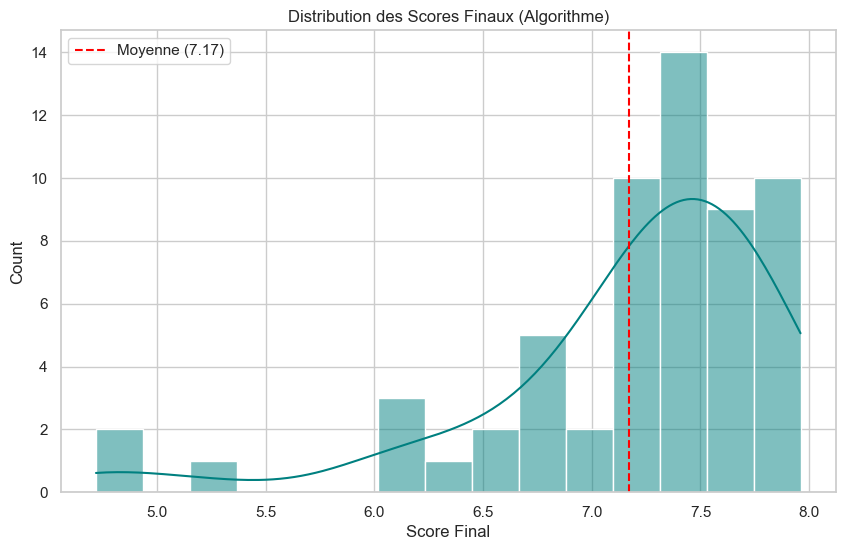

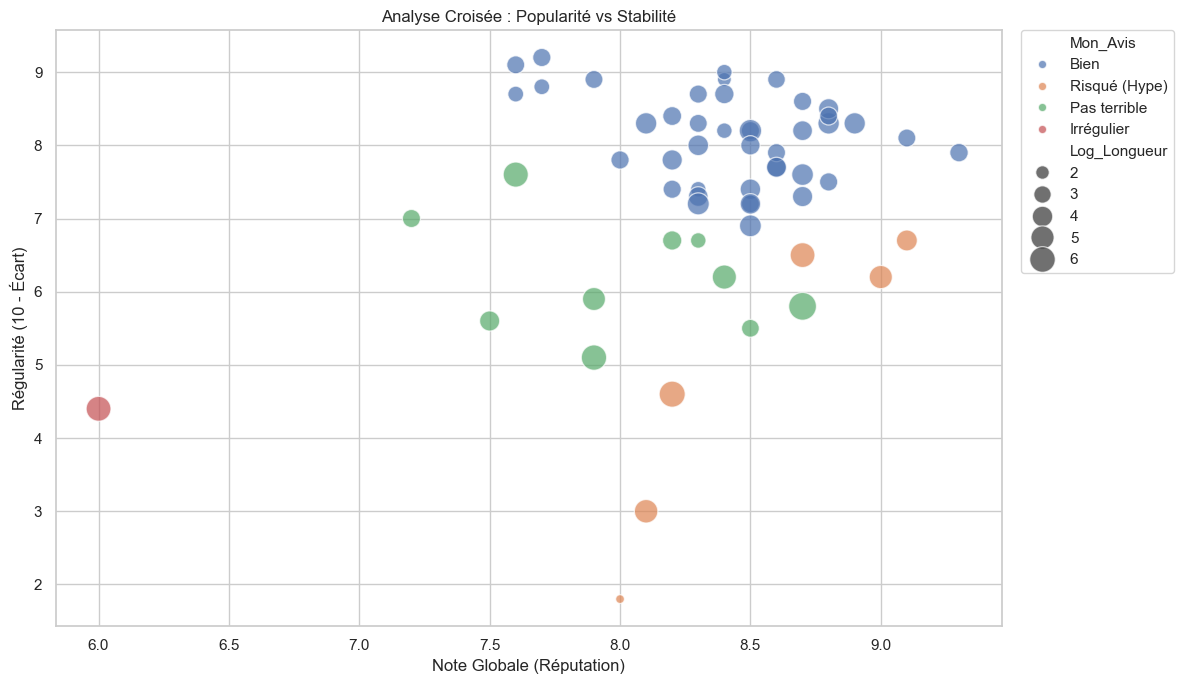

C:\Users\terko\AppData\Local\Temp\ipykernel_22660\2024655597.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Score_Final', y='Anime', palette='magma')


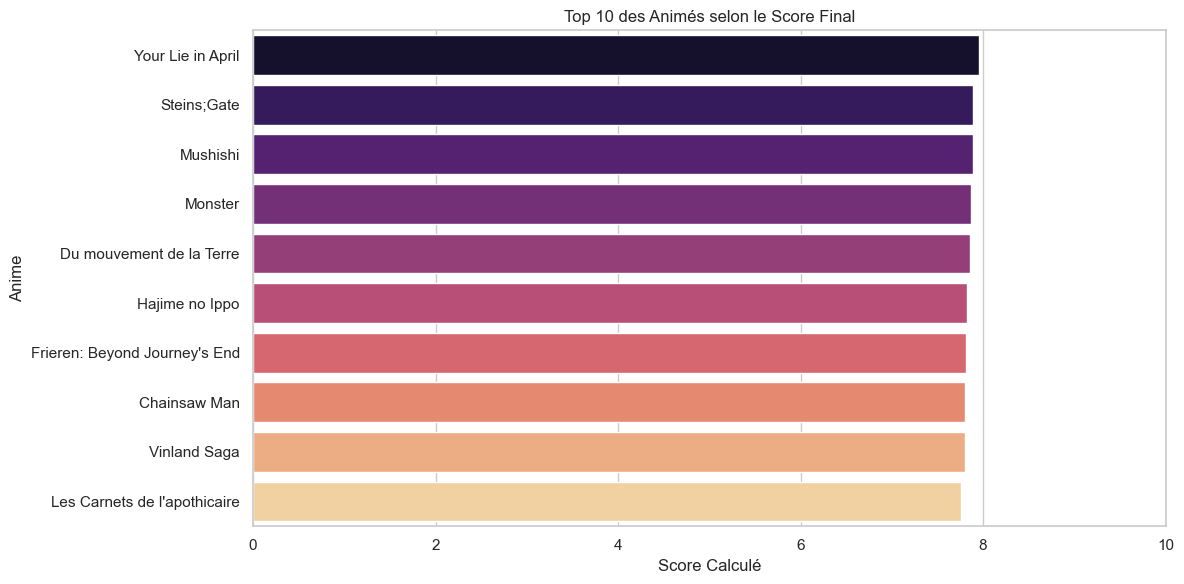

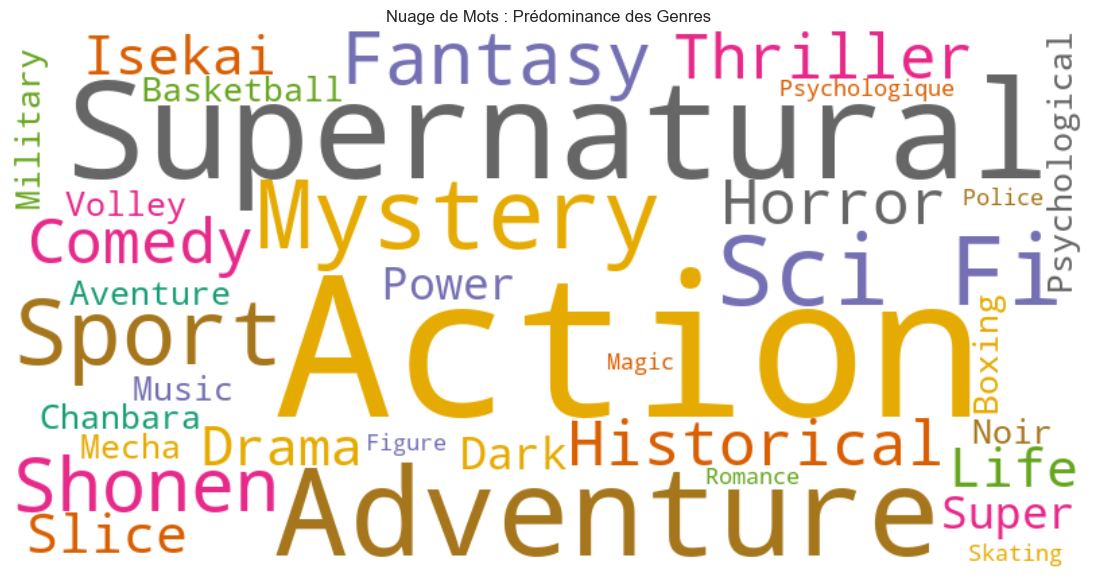

Terminé ! Les graphiques ont été générés à partir des données nettoyées.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. CHARGEMENT DES DONNÉES DÉJÀ CALCULÉES
df = pd.read_csv('animes_calcules_complet.csv')

# 2. RAPPORT EDA : STATISTIQUES & INSIGHTS (Utilisation des colonnes existantes)
print(" RAPPORT EDA : STATISTIQUES CLÉS ")

avg_global = df['Note_Globale'].mean()
avg_final = df['Score_Final'].mean()

print(f"1. Comparaison des Moyennes :")
print(f"   - Note Globale (Public) : {avg_global:.2f}/10")
print(f"   - Score Final (Algorithme) : {avg_final:.2f}/10")

# Analyse de la Hype
nb_surcote = len(df[df['Difference_Hype'] > 1.0])
pourcentage_hype = (nb_surcote / len(df)) * 100
print(f"\n2. Analyse de la Hype :")
print(f"   - Nombre d'animés 'Surcotés' (Hype > 1.0) : {nb_surcote}")
print(f"   - Soit {pourcentage_hype:.1f}% du dataset.")

# Corrélation
corr = df[['Note_Globale', 'Regularite']].corr().iloc[0, 1]
print(f"\n3. Corrélation Note vs Régularité : {corr:.2f}")

# 3. GÉNÉRATION DES GRAPHIQUES
sns.set_theme(style="whitegrid", palette="muted")

# --- GRAPHIQUE 1 : DISTRIBUTION DES SCORES
plt.figure(figsize=(10, 6))
sns.histplot(df['Score_Final'], kde=True, bins=15, color='teal')
plt.axvline(avg_final, color='red', linestyle='--', label=f'Moyenne ({avg_final:.2f})')
plt.title("Distribution des Scores Finaux (Algorithme)")
plt.xlabel("Score Final")
plt.legend()
plt.savefig('Graphe_distribution_scores.png')
plt.show()

# GRAPHIQUE 2 : SCATTER PLOT MULTIDIMENSIONNEL
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=df, 
    x='Note_Globale', 
    y='Regularite', 
    hue='Mon_Avis', 
    size='Log_Longueur', 
    sizes=(40, 400), 
    alpha=0.7,
    palette='deep'
)
plt.title("Analyse Croisée : Popularité vs Stabilité")
plt.xlabel("Note Globale (Réputation)")
plt.ylabel("Régularité (10 - Écart)")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.savefig('scatter_correlation.png')
plt.show()

# GRAPHIQUE 3 : TOP 10 BARPLOT
top_10 = df.head(10) # Déjà trié dans le CSV
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10, x='Score_Final', y='Anime', palette='magma')
plt.title("Top 10 des Animés selon le Score Final")
plt.xlabel("Score Calculé")
plt.xlim(0, 10)
plt.tight_layout()
plt.savefig('Graphe_top10.png')
plt.show()

# GRAPHIQUE 4 : WORDCLOUD DES GENRES
text_genres = " ".join(str(t).replace(' / ', ' ').replace(',', ' ') for t in df['Genre_Tags'])
wordcloud = WordCloud(
    width=800, height=400, 
    background_color='white', 
    colormap='Dark2',
    max_words=100
).generate(text_genres)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de Mots : Prédominance des Genres")
plt.savefig('Graphe_wordcloud.png')
plt.show()

print("Terminé ! Les graphiques ont été générés à partir des données nettoyées.")